# Introduction to RDKit
- Getting started with RDKit: https://www.rdkit.org/docs/GettingStartedInPython.html
- https://molecularmodelingbasics.blogspot.com/2016/05/a-brief-introduction-to-smiles-and-inchi.html
- Introduction to SMILES: https://molecularmodelingbasics.blogspot.com/2016/05/a-brief-introduction-to-smiles-and-inchi.html

- SMILES GUI: http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html 
- SMARTS: https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html
- SMARTS examples: https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html
- Jan H. Jensen: https://sites.google.com/view/ml-basics/home

In [1]:
# import librray
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import  Descriptors
from rdkit.Chem import AllChem 
from rdkit import DataStructs
import numpy as np 

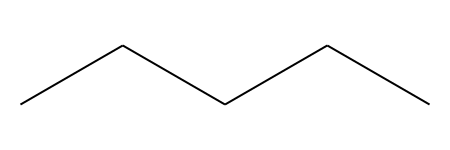

In [2]:
# Molecules from smiles 
mol = Chem.MolFromSmiles('CCCCC')
mol 

In [3]:
# number of atoms 
mol.GetNumAtoms() 

5

In [4]:
# number of bonds 
mol.GetNumBonds() 

4

In [5]:
# molecule info 
mol.GetRingInfo() 

In [6]:
# number of heavy atoms 
mol.GetNumHeavyAtoms()

5

In [7]:
# type: rdkit object  
type(mol)

rdkit.Chem.rdchem.Mol

In [8]:
# Molecules to smiles 
smiles = Chem.MolToSmiles(mol)
smiles 

'CCCCC'

In [9]:
# type:string object 
type(smiles)

str

In [10]:
# Molecular Weight
mw = Descriptors.MolWt(mol)
mw 

72.151

In [11]:
# Smiles list
# https://en.wikipedia.org/wiki/Glycine
# https://en.wikipedia.org/wiki/Phenylalanine
# https://en.wikipedia.org/wiki/Histidine
# https://en.wikipedia.org/wiki/Cysteine
smiles_list =   ["C(C(=O)O)N", "N[C@@H](CC1=CC=CC=C1)C(O)=O", 
                 "O=C([C@H](CC1=CNC=N1)N)O", "C([C@@H](C(=O)O)N)S"] 

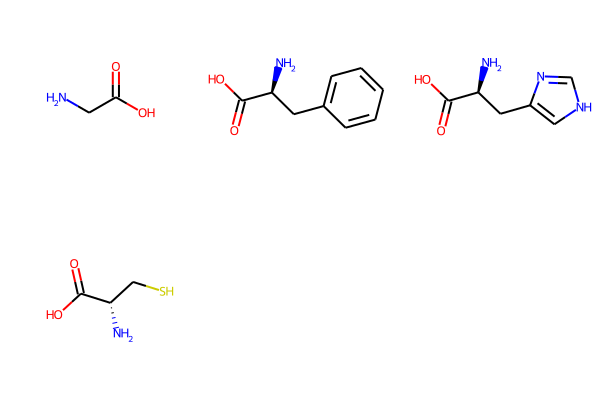

In [14]:
mol_list = []
for smiles in smiles_list: 
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol) 

# Draw molecular image 
img = Draw.MolsToGridImage(mol_list)  
img 

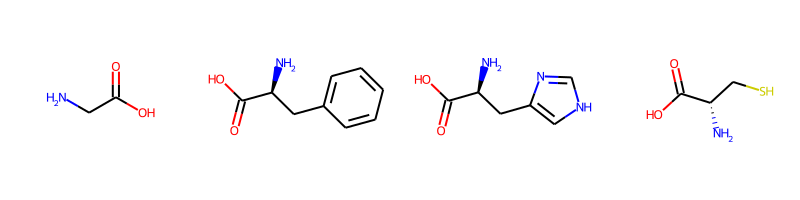

In [15]:
mol_list = []
for smiles in smiles_list: 
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol) 

# Draw molecular image 
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)  
img 

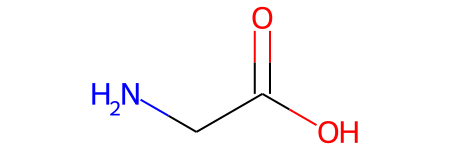

In [16]:
# Slicing Molecules 
glycine = mol_list[0]
glycine

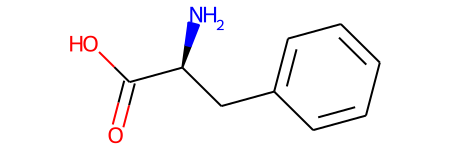

In [17]:
phenylalanine = mol_list[1]
phenylalanine

In [19]:
# Pattern Matching 
pattern = Chem.MolFromSmiles('S')
for mol in mol_list: 
  print(mol.HasSubstructMatch(pattern)) 

False
False
False
True


In [20]:
# Pattern Matching
pattern = Chem.MolFromSmiles('C')
for mol in mol_list: 
  print(mol.HasSubstructMatch(pattern)) 

True
True
True
True


In [21]:
# Pattern Matching 
pattern = Chem.MolFromSmiles('C(=O)O')
for mol in mol_list: 
  print(mol.HasSubstructMatch(pattern)) 

True
True
True
True


In [22]:
# Pattern Matching 
pattern = Chem.MolFromSmiles('CC(N)C')
for mol in mol_list: 
  print(mol.HasSubstructMatch(pattern)) 

False
True
True
True


In [24]:
# Pattern Matching: Smart 
pattern = Chem.MolFromSmarts('[r]') 
for mol in mol_list: 
  print(mol.HasSubstructMatch(pattern)) 

False
True
True
False
